### ROUND 1

In [265]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from matplotlib import pyplot as plt

In [266]:
churnData = pd.read_csv('DATA_customer-churn.txt')
churnData.head()


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No,Yes,No,No,No,No,Month-to-month,29.85,29.85,No
1,Male,0,No,No,34,Yes,Yes,No,Yes,No,No,No,One year,56.95,1889.5,No
2,Male,0,No,No,2,Yes,Yes,Yes,No,No,No,No,Month-to-month,53.85,108.15,Yes
3,Male,0,No,No,45,No,Yes,No,Yes,Yes,No,No,One year,42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,No,No,No,No,No,Month-to-month,70.70,151.65,Yes


In [267]:
# Check the datatypes of all the columns in the data.You would see that the column TotalCharges is object type. 
# Convert this column into numeric type using pd.to_numeric function.

churnData.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [268]:
churnData['TotalCharges'] = pd.to_numeric(churnData['TotalCharges'], errors='coerce')


In [269]:
# Check for null values in the dataframe. Replace the null values.

mean_value = churnData['TotalCharges'].mean()
churnData['TotalCharges'].fillna(mean_value, inplace=True)
churnData['TotalCharges'].isna().sum()

0

In [270]:
# Change Churn to 0 or 1 instead of yes or no to avoid errors in furhter steps.

churnData['Churn'] = churnData['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)
churnData['Churn'].head()

churnData['Churn'].value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

In [287]:
# Use the following features: tenure, SeniorCitizen, MonthlyCharges and TotalCharges:
# - Split the data into a training set and a test set.
# - Scale the features either by using MinMaxScaler or a standard scaler.

X = churnData[['tenure', 'SeniorCitizen', 'MonthlyCharges', 'TotalCharges']]
y = churnData['Churn']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


scaler = StandardScaler().fit(X_train)
X_train_scaled = pd.DataFrame(scaler.transform(X_train),columns=X.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test),columns=X.columns)

y

# X_test_scaled = pd.DataFrame(scaler.transform(X_test),columns=X.columns)


In [309]:
len(y_train.reset_index(drop=True))

5634

### ROUND 2

In [288]:
# (Optional) Fit a logistic Regression model on the training data.

logistic_model = LogisticRegression(random_state=42)
logistic_model.fit(X_train_scaled, y_train)

# Predict
logistic_train_pred = logistic_model.predict(X_train_scaled)

logistic_train_accuracy = accuracy_score(y_train, logistic_train_pred)
logistic_train_precision = precision_score(y_train, logistic_train_pred)
logistic_train_recall = recall_score(y_train, logistic_train_pred)


print(f'accuracy on the test set: {logistic_train_accuracy}')
print(f'precision on the test set: {logistic_train_precision}')
print(f'recall on the test set: {logistic_train_recall}')


accuracy on the test set: 0.7875399361022364
precision on the test set: 0.6455696202531646
recall on the test set: 0.4431818181818182


In [289]:
# Fit a Knn Classifier (NOT KnnRegressor please!)model on the training data.

knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

knn_train_pred = knn_model.predict(X_train_scaled)

knn_train_accuracy = accuracy_score(y_train, knn_train_pred)
knn_train_precision = precision_score(y_train, knn_train_pred)
knn_train_recall = recall_score(y_train, knn_train_pred)


print(f'Accuracy on the test set: {knn_train_accuracy}')
print(f'precision on the test set: {knn_train_precision}')
print(f'recall on the test set: {knn_train_recall}')

Accuracy on the test set: 0.7344692935747249
precision on the test set: 0.0
recall on the test set: 0.0


C:\Users\A.S.A\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [290]:
# Fit a Decision Tree Classifier on the training data.

dtree_model = DecisionTreeClassifier(random_state=42)

dtree_model.fit(X_train, y_train)

dtree_train_pred = dtree_model.predict(X_train_scaled)

dtree_train_accuracy = accuracy_score(y_train, dtree_train_pred)
dtree_train_precision = precision_score(y_train, dtree_train_pred)
dtree_train_recall = recall_score(y_train, dtree_train_pred)


print(f'Accuracy on the test set: {dtree_train_accuracy}')
print(f'precision on the test set: {dtree_train_precision}')
print(f'recall on the test set: {dtree_train_recall}')

Accuracy on the test set: 0.7067802626908058
precision on the test set: 0.4139072847682119
recall on the test set: 0.25066844919786097


In [291]:
# Compare the accuracy, precision, recall for the previous models on both the train and test sets.

metrics_dict = {
    'Model': ['Logistic Regression', 'K Nearest Neighbour(knn)', 'Decision Tree'],
    'Accuracy': [logistic_accuracy, knn_accuracy, dtree_accuracy],
    'Precision': [logistic_precision, knn_precision, dtree_precision],
    'Recall': [logistic_recall, knn_recall, dtree_recall]
}

tain_metrics = pd.DataFrame(metrics_dict)

print(tain_metrics)

                      Model  Accuracy  Precision    Recall
0       Logistic Regression  0.803407   0.692000  0.463807
1  K Nearest Neighbour(knn)  0.735273   0.000000  0.000000
2             Decision Tree  0.711143   0.427966  0.270777


In [292]:
# accuracy, precision and recall on test sets

logistic_test_pred = logistic_model.predict(X_test_scaled)
knn_test_pred = knn_model.predict(X_test_scaled)
dtree_test_pred = dtree_model.predict(X_test_scaled)

logistic_test_accuracy = accuracy_score(y_test, logistic_test_pred)
logistic_test_precision = precision_score(y_test, logistic_test_pred)
logistic_test_recall = recall_score(y_test, logistic_test_pred)

knn_test_accuracy = accuracy_score(y_test, knn_test_pred)
knn_test_precision = precision_score(y_test, knn_test_pred)
knn_test_recall = recall_score(y_test, knn_test_pred)

dtree_test_accuracy = accuracy_score(y_test, dtree_test_pred)
dtree_test_precision = precision_score(y_test, dtree_test_pred)
dtree_test_recall = recall_score(y_test, dtree_test_pred)


metrics_dict = {
    'Model': ['Logistic Regression', 'K Nearest Neighbour(knn)', 'Decision Tree'],
    'Accuracy': [logistic_accuracy, knn_accuracy, dtree_accuracy],
    'Precision': [logistic_precision, knn_precision, dtree_precision],
    'Recall': [logistic_recall, knn_recall, dtree_recall]
}

test_metrics = pd.DataFrame(metrics_dict)

print(test_metrics)


                      Model  Accuracy  Precision    Recall
0       Logistic Regression  0.803407   0.692000  0.463807
1  K Nearest Neighbour(knn)  0.735273   0.000000  0.000000
2             Decision Tree  0.711143   0.427966  0.270777


C:\Users\A.S.A\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [293]:
print("Train Metrics")
print(tain_metrics)
print(" ")
print("Test Metrics")
print(test_metrics)

Train Metrics
                      Model  Accuracy  Precision    Recall
0       Logistic Regression  0.803407   0.692000  0.463807
1  K Nearest Neighbour(knn)  0.735273   0.000000  0.000000
2             Decision Tree  0.711143   0.427966  0.270777
 
Test Metrics
                      Model  Accuracy  Precision    Recall
0       Logistic Regression  0.803407   0.692000  0.463807
1  K Nearest Neighbour(knn)  0.735273   0.000000  0.000000
2             Decision Tree  0.711143   0.427966  0.270777


### ROUND 3

In [294]:
# apply K-fold cross validation on your models built before,  and check the model score. Note: So far we have not balanced the data.

# Assuming you have X_train and y_train already defined

# Logistic Regression
logistic_model = LogisticRegression(random_state=42)
logistic_scores = cross_val_score(logistic_model, X_train, y_train, cv=5)  # You can adjust the number of folds (cv) as needed
print(f'LR Cross-Validation Scores: {logistic_scores}')
print(f'Mean Accuracy: {logistic_scores.mean()} \n')

# K-nearest Neighbors (KNN)
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_scores = cross_val_score(knn_model, X_train, y_train, cv=5)
print(f'KNN Cross-Validation Scores: {knn_scores}')
print(f'Mean Accuracy: {knn_scores.mean()} \n')

# Decision Tree
dtree_model = DecisionTreeClassifier(random_state=42)
dtree_scores = cross_val_score(dtree_model, X_train, y_train, cv=5)
print(f'DT Cross-Validation Scores: {dtree_scores}')
print(f'Mean Accuracy: {dtree_scores.mean()}')



LR Cross-Validation Scores: [0.80035492 0.78793256 0.77196096 0.79680568 0.77886323]
Mean Accuracy: 0.7871834717360573 

KNN Cross-Validation Scores: [0.77462289 0.7755102  0.7595386  0.74800355 0.75754885]
Mean Accuracy: 0.7630448178962681 

DT Cross-Validation Scores: [0.72138421 0.72049689 0.71251109 0.72404614 0.71136767]
Mean Accuracy: 0.7179612010067753


### ROUND 4

In [295]:
# fit a Random forest Classifier on the data and compare the accuracy.

rf_model = RandomForestClassifier(n_estimators=100)

rf_model.fit(X_train_scaled, y_train)

rf_pred = rf_model.predict(X_test_scaled)

rf_accuracy = accuracy_score(y_test, rf_pred)

print(f"accuracy: {rf_accuracy}")


accuracy: 0.7721788502484032


In [238]:

# from sklearn.model_selection import GridSearchCV

# # Define the parameter grid to search (IT MIGHT TAKE 5-10 MINUTES TO PROCESS)
# param_grid = {
#     'n_estimators': [25, 50, 100, 150],
#     'max_depth': [None, 10, 15, 20],
#     'min_samples_split': [2, 5, 10, 15],
#     'min_samples_leaf': [1, 2, 4, 6]
# }

# grid_search = GridSearchCV(rf_model, param_grid, cv=5, scoring='accuracy')
# grid_search.fit(X_train_scaled, y_train)

# # Display the best hyperparameters
# best_params = grid_search.best_params_
# print("Best Hyperparameters:", best_params)


# # ACCURACY AFTER OPTIMAL HYPERPARAMETERS

# rf_model = RandomForestClassifier(n_estimators=best_params['n_estimators'], 
#                                   max_depth=best_params['max_depth'], 
#                                   min_samples_leaf=best_params['min_samples_leaf'], 
#                                   min_samples_split=best_params['min_samples_split'], 
#                                   random_state=42)

# rf_model.fit(X_train_scaled, y_train)

# rf_pred = rf_model.predict(X_test_scaled)

# rf_accuracy = accuracy_score(y_test, rf_pred)

# print(f"accuracy: {rf_accuracy}")



Best Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 15, 'n_estimators': 25}
accuracy: 0.8034066713981547


In [242]:
best_params['n_estimators']

25

#### Managing imbalance in the dataset

Text(0.5, 0, 'Churn (Yes: 1, No: 0)')

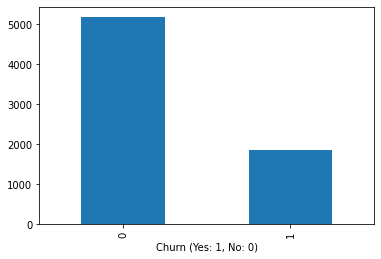

In [296]:
# Check for the imbalance
churnData['Churn'].value_counts().plot(kind='bar')
plt.xlabel("Churn (Yes: 1, No: 0)")

In [304]:
# Use the resampling strategies used in class for upsampling and downsampling to create a balance between the two classes.
# Each time fit the model and check the accuracy of the model.

y_train.isna().sum(), X_train_scaled.isna().sum()
# y_train.isna().sum()
y_train.head()

2142    0
1623    0
6074    1
1362    1
6754    0
Name: Churn, dtype: int64

### OVERSAMPLING / UNDERSAMPLING

In [314]:
trainData = pd.concat([X_train_scaled, y_train], axis=1)
# trainData.columns = ['tenure', 'SeniorCitizen', 'MonthlyCharges', 'TotalCharges', 'Churn']
trainData.head(20)

,tenure,SeniorCitizen,MonthlyCharges,TotalCharges,Churn
0,-0.465683,-0.437749,-0.000474,-0.422099,0.0
1,0.885537,-0.437749,1.074754,1.255366,0.0
2,-1.284605,-0.437749,-1.376499,-1.002985,1.0
3,-1.161766,-0.437749,0.177346,-0.908113,0.0
4,-1.325551,-0.437749,-0.098524,-0.003468,1.0
5,-1.038928,-0.437749,0.155742,-0.782767,1.0
6,-0.015277,-0.437749,-1.526067,-0.741811,0.0
7,1.622566,-0.437749,-1.497815,-0.387666,0.0
8,-0.547575,-0.437749,-0.838054,-0.689001,NaN
9,-0.916090,-0.437749,-1.492830,-0.916274,0.0


In [316]:

# X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)

trainData = pd.concat([X_train_scaled.reset_index(drop=True), y_train.reset_index(drop=True)], axis=1)

# Display the shape and null values of the resulting DataFrame
print("Shape of trainData:", trainData.shape)
print("Null values in trainData:")
print(trainData.isna().sum())
trainData.head(20)
# y_train.head(20)
X_train_scaled.shape, y_train.shape

Shape of trainData: (5634, 5)
Null values in trainData:
tenure            0
SeniorCitizen     0
MonthlyCharges    0
TotalCharges      0
Churn             0
dtype: int64


((5634, 4), (5634,))

In [317]:
trainData.isna().sum()

tenure            0
SeniorCitizen     0
MonthlyCharges    0
TotalCharges      0
Churn             0
dtype: int64

#### OverSampling

In [318]:
yes_churn = trainData[trainData['Churn'] == 1]
yes_churn.shape

no_churn = trainData[trainData['Churn'] == 0]
no_churn.shape

print(yes_churn.shape, no_churn.shape)

no_churn.isna().sum()

(1496, 5) (4138, 5)


tenure            0
SeniorCitizen     0
MonthlyCharges    0
TotalCharges      0
Churn             0
dtype: int64

In [320]:
# oversample minority
from sklearn.utils import resample
yes_churn_oversampled = resample(yes_churn, #<- sample from here
                                    replace=True, #<- we need replacement, since we don't have enough data otherwise
                                    n_samples = len(no_churn),#<- make both sets the same size
                                    random_state=0)

In [322]:
yes_churn_oversampled.shape

(4138, 5)

In [323]:
yes_churn_oversampled.groupby(yes_churn_oversampled.columns.tolist(),as_index=False).size()

,tenure,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,size
0,-1.284605,-0.437749,-1.529391,-1.005020,1,1
1,-1.284605,-0.437749,-1.521082,-1.004909,1,1
2,-1.284605,-0.437749,-1.516096,-1.004843,1,2
3,-1.284605,-0.437749,-1.514434,-1.004821,1,3
4,-1.284605,-0.437749,-1.509448,-1.004754,1,5
...,...,...,...,...,...,...
1359,1.581620,-0.437749,1.453659,2.388279,1,3
1360,1.622566,-0.437749,-0.354451,0.728152,1,5
1361,1.622566,-0.437749,1.280825,2.247520,1,3
1362,1.622566,-0.437749,1.475264,2.573556,1,3


In [324]:
display(no_churn.shape)
display(yes_churn_oversampled.shape)

(4138, 5)

(4138, 5)

In [327]:
train_oversampled = pd.concat([no_churn,yes_churn_oversampled],axis=0)
train_oversampled.head()

,tenure,SeniorCitizen,MonthlyCharges,TotalCharges,Churn
0,-0.465683,-0.437749,-0.000474,-0.422099,0
1,0.885537,-0.437749,1.074754,1.255366,0
4,-1.325551,-0.437749,-0.098524,-0.003468,0
5,-1.038928,-0.437749,0.155742,-0.782767,0
6,-0.015277,-0.437749,-1.526067,-0.741811,0


In [328]:
y_train_over = train_oversampled['Churn'].copy()
X_train_over = train_oversampled.drop('Churn',axis = 1).copy()

In [330]:
# Our Logistic Regression, while still not amazing, has improved substantially!
# especially at detecting instances of diabetes
from sklearn.metrics import f1_score

LR = LogisticRegression(max_iter=1000)
LR.fit(X_train_over, y_train_over)
pred = LR.predict(X_test_scaled)

print("precision: ",precision_score(y_test,pred))
print("recall: ",recall_score(y_test,pred))
print("f1: ",f1_score(y_test,pred))

precision:  0.5079928952042628
recall:  0.7667560321715817
f1:  0.6111111111111112


In [332]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test,pred)

array([[759, 277],
       [ 87, 286]], dtype=int64)

In [335]:
def evaluate_model(note, model, X_test, y_test, results):
    pred = model.predict(X_test)
    score = model.score(X_test, y_test)
    precision = precision_score(y_test,pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    false_negatives = confusion_matrix(y_test, pred)[1][0]
    new_result = pd.DataFrame({'note':note,'accuracy':score,'precision':precision,'recall':recall,'f1_score':f1,'false_negatives':false_negatives},index=[0])
    return pd.concat([results,new_result],axis=0)

results = pd.DataFrame(columns=['note','accuracy','precision','recall','f1_score', 'false_negatives'])

In [336]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

results = evaluate_model('Oversampling', LR, X_test_scaled, y_test, results)
results

,note,accuracy,precision,recall,f1_score,false_negatives
0,Oversampling,0.741661,0.507993,0.766756,0.611111,87


### Undersampling

In [337]:
# we already split our training data on the target variable...

# undersample majority
no_churn_undersampled = resample(no_churn, #<- downsample from here
                                    replace=False, #<- no need to reuse data now, we have an abundance
                                    n_samples = len(yes_churn),
                                    random_state=0)

In [339]:
# both sets are the same size
# small, but balanced, and no repeated data
display(yes_churn.shape)
display(no_churn_undersampled.shape)

(1496, 5)

(1496, 5)

In [341]:
train_undersampled = pd.concat([yes_churn,no_churn_undersampled])
train_undersampled.head()

,tenure,SeniorCitizen,MonthlyCharges,TotalCharges,Churn
2,-1.284605,-0.437749,-1.376499,-1.002985,1
3,-1.161766,-0.437749,0.177346,-0.908113,1
8,-0.547575,-0.437749,-0.838054,-0.689001,1
10,-0.465683,2.284413,0.140785,-0.361084,1
26,-0.997982,2.284413,0.905243,-0.690505,1


In [343]:
y_train_under = train_undersampled['Churn'].copy()
X_train_under = train_undersampled.drop('Churn',axis = 1).copy()

In [344]:
# Still a slight improvement!
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression(max_iter=1000)
LR.fit(X_train_under, y_train_under)
pred = LR.predict(X_test_scaled)

results = evaluate_model('Undersampling', LR, X_test_scaled, y_test, results)
results

,note,accuracy,precision,recall,f1_score,false_negatives
0,Oversampling,0.741661,0.507993,0.766756,0.611111,87
0,Undersampling,0.741661,0.507881,0.777480,0.614407,83


### SMOTE

In [345]:
from imblearn.over_sampling import SMOTE

In [346]:
sm = SMOTE(random_state=100,k_neighbors=9)
X_train_SMOTE,y_train_SMOTE = sm.fit_resample(X_train_scaled,y_train)

In [347]:
# yet another small improvement, but bear in mind that we saved 12 hypothetical people with
# these "small improvements"
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression(max_iter=1000)
LR.fit(X_train_SMOTE, y_train_SMOTE)
pred = LR.predict(X_test_scaled)

results = evaluate_model('SMOTE', LR, X_test_scaled, y_test, results)
results

,note,accuracy,precision,recall,f1_score,false_negatives
0,Oversampling,0.741661,0.507993,0.766756,0.611111,87
0,Undersampling,0.741661,0.507881,0.777480,0.614407,83
0,SMOTE,0.745209,0.512456,0.772118,0.616043,85


In [348]:
confusion_matrix(y_test,pred)

array([[762, 274],
       [ 85, 288]], dtype=int64)